### MNIST database of handwritten digits
This is a database of images of handwritten digits. We will build a classifier to determine which digit is in the image.

We will start with the version of the MNIST dataset that is built into scikit-learn. This has the images with only 8 by 8 pixels, so they are blurry.


- Here are a couple example images:



![shsg](./handwrittendigits.jpg)

In scikit-learn we can load the dataset using the load_digits function. To simplify the problem, we will initially only be working with two digits (0 and 1), so we use the n_class parameter to limit the number of target values to 2.



In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [3]:
X, y = load_digits(n_class=2, return_X_y=True)

In [4]:
X.shape

(360, 64)

In [5]:
y.shape

(360,)

In [6]:
print(X[0])
X[0].shape

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


(64,)

In [7]:
print(y[0])
y[0].shape

0


()

In [8]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Drawing the Digits

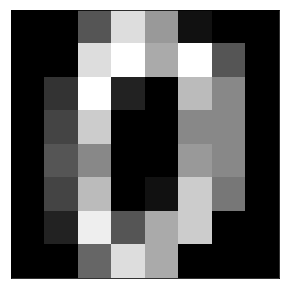

In [9]:
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [11]:
mlp = MLPClassifier()

In [12]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

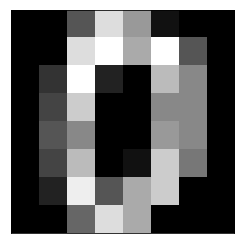

array([0])

In [13]:
x = X[0]
plt.matshow(x.reshape(8, 8), cmap = plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

# predict 0
mlp.predict([x])

In [14]:
x = X_train[2]
x

array([ 0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        8.,  0.,  0.,  0., 12., 16., 16., 16.,  2.,  0.,  0.,  0.,  9.,
        9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,
        0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
       10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  2.,  0.,  0.])

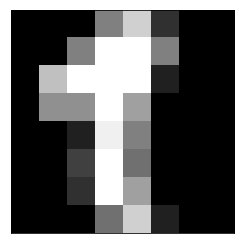

array([1])

In [15]:
plt.matshow(x.reshape(8, 8), cmap = plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

# predict 1
mlp.predict([x])

In [16]:
mlp.score(X_train, y_train)

1.0

# Classifying all 10 Digits

In [17]:
X, y = load_digits(return_X_y=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [53]:
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [54]:
mlp.score(X_train, y_train)

1.0

In [57]:
y_pred = mlp.predict(X_test)

In [58]:
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_predict = y_pred[y_pred != y_test]

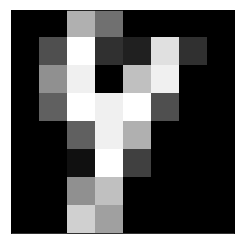

real value: 4
predicted value: 9


In [63]:
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print('real value:', incorrect_true[j])
print('predicted value:', incorrect_predict[j])